# EDA DESAFIO

### IMPORTACIONES

In [192]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


## PRIMERA EXPLORACIÓN

In [80]:
df= pd.read_csv("./data/raw/census.csv")

df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [81]:
df.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [82]:
df.shape

(45222, 14)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [84]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [85]:
df.sample(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
38160,28,State-gov,HS-grad,9.0,Married-civ-spouse,Protective-serv,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
41857,29,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0.0,2415.0,40.0,Puerto-Rico,>50K
23080,61,Private,9th,5.0,Widowed,Exec-managerial,Not-in-family,Black,Male,0.0,0.0,65.0,United-States,<=50K
18739,49,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
19325,38,Private,9th,5.0,Married-civ-spouse,Other-service,Wife,Black,Female,0.0,0.0,24.0,Haiti,<=50K


In [86]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [87]:
df.describe(exclude=object).round(2)

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.00,45222.00,45222.00,45222.00,45222.00
mean,38.55,10.12,1101.43,88.60,40.94
std,13.22,2.55,7506.43,404.96,12.01
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,47.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


In [88]:
df.describe(include=object).round(2)

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [89]:
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [90]:
df.isna().sum()/len(df)*100

age                0.0
workclass          0.0
education_level    0.0
education-num      0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [91]:
df.duplicated().sum()

5982

### CARDINALIDAD

In [92]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable workclass es 0.02%
La cardinalidad de la variable education_level es 0.04%
La cardinalidad de la variable marital-status es 0.02%
La cardinalidad de la variable occupation es 0.03%
La cardinalidad de la variable relationship es 0.01%
La cardinalidad de la variable race es 0.01%
La cardinalidad de la variable sex es 0.00%
La cardinalidad de la variable native-country es 0.09%
La cardinalidad de la variable income es 0.00%


La mayoría de las variables tienen una baja cardinalidad, lo que sugiere que hay relativamente pocos valores únicos en comparación con el tamaño total del conjunto de datos.

## LIMPIEZA

- No veo que haya que hacer mucha limpieza

In [93]:
# Eliminar duplicados

df= df.drop_duplicates()

## GUARDAR NUEVA BASE DE DATOS

In [94]:
df.to_csv("census_df.csv",index=False)

## ANALISIS EXPLORATORIO 

In [95]:
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,48,Local-gov,Masters,14.0,Divorced,Other-service,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


#### DF NUMERICO

In [96]:
df_num= df.select_dtypes(include=["int64","float64"])

df_num

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0
...,...,...,...,...,...
45216,48,14.0,0.0,0.0,40.0
45217,33,13.0,0.0,0.0,40.0
45218,39,13.0,0.0,0.0,36.0
45220,44,13.0,5455.0,0.0,40.0


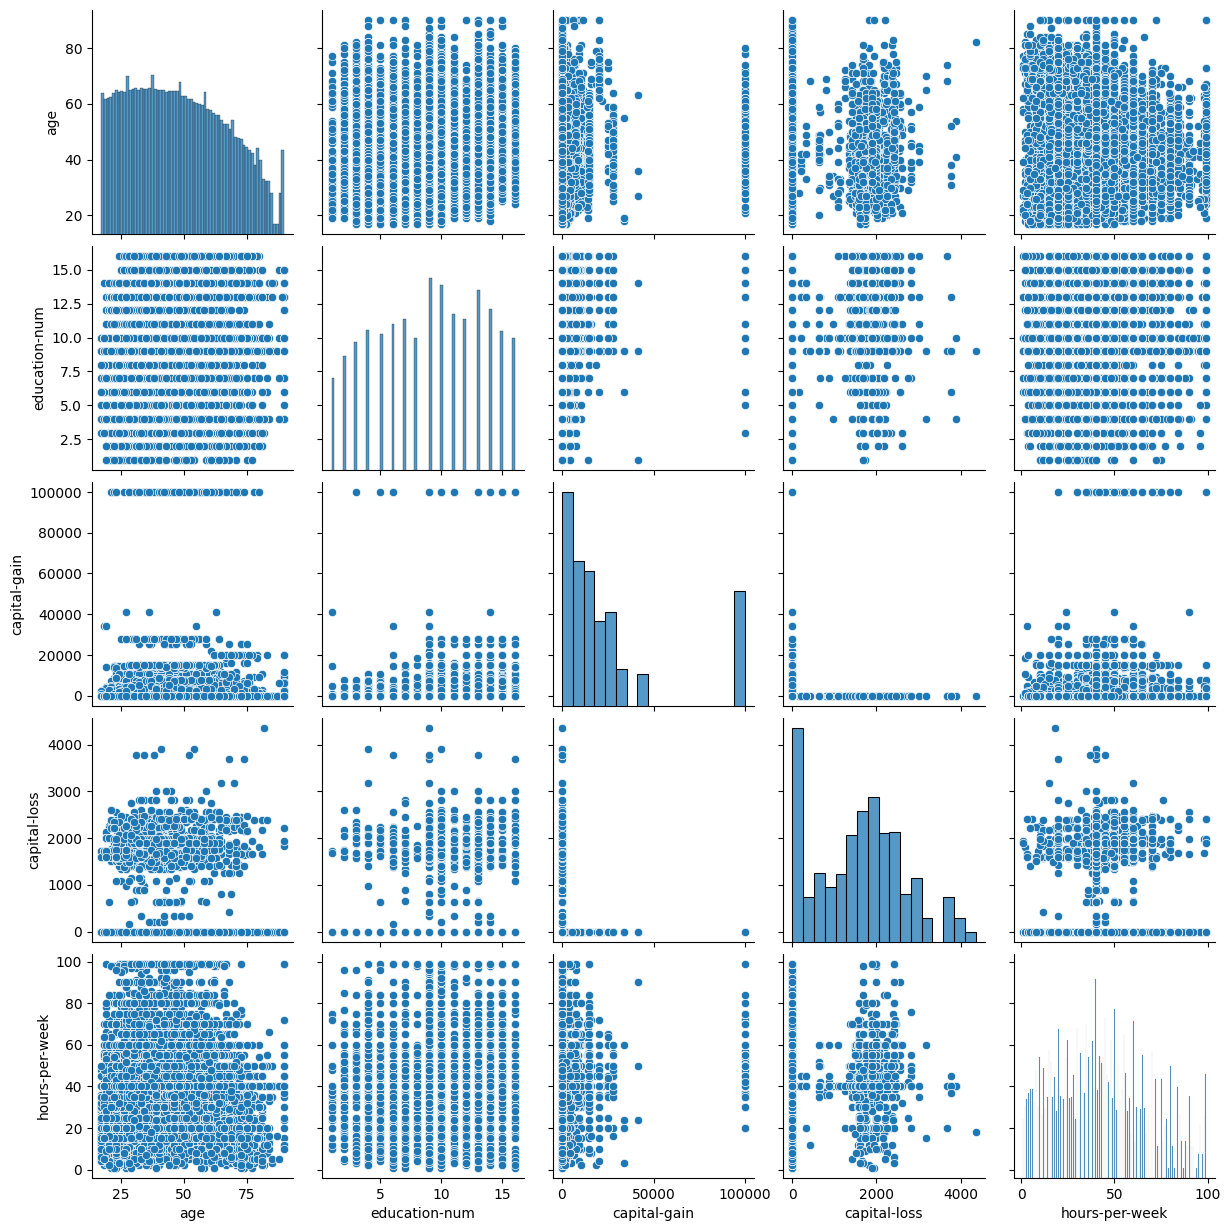

In [139]:
sns.pairplot(df_num)
plt.yscale("log") 
plt.show()

### ANÁLISIS UNIVARIANTE

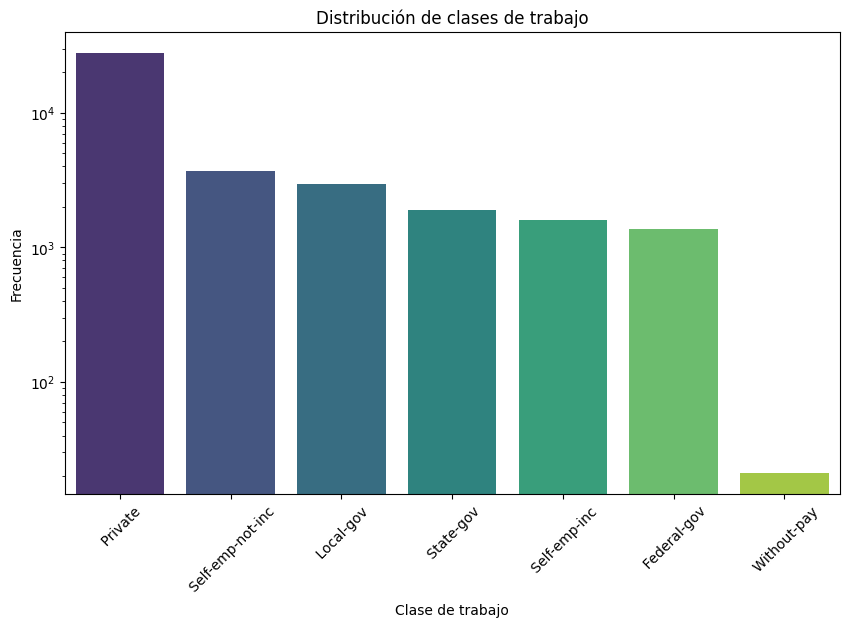

In [134]:
# la frecuencia de cada clase de trabajo
workclass_con= df["workclass"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_con.index, y=workclass_con.values, palette="viridis")
plt.title("Distribución de clases de trabajo")
plt.yscale("log") 
plt.xlabel("Clase de trabajo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45) 
plt.show()

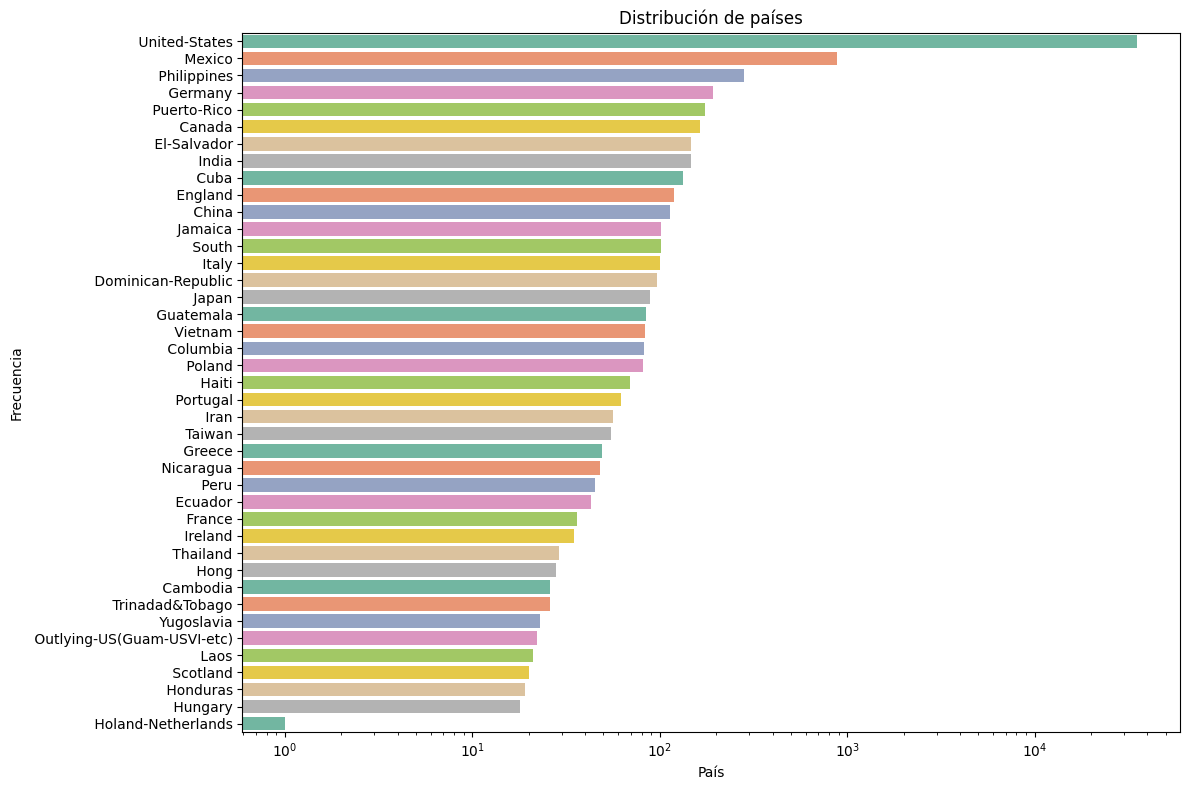

In [150]:
# la frecuencia de cada país
country_counts = df["native-country"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="Set2")
plt.xscale("log") 
plt.title("Distribución de países")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.tight_layout() 
plt.show()

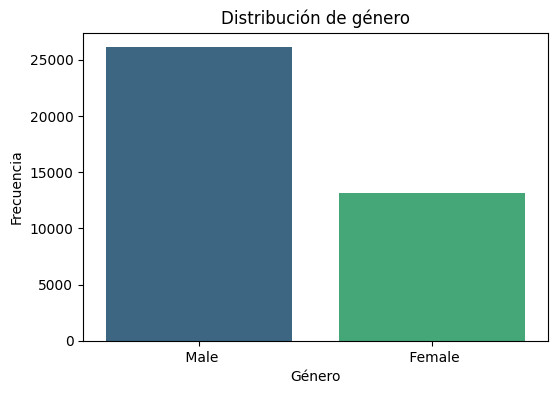

In [151]:
# la frecuencia de cada género
sex_counts= df["sex"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette="viridis")
plt.title("Distribución de género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

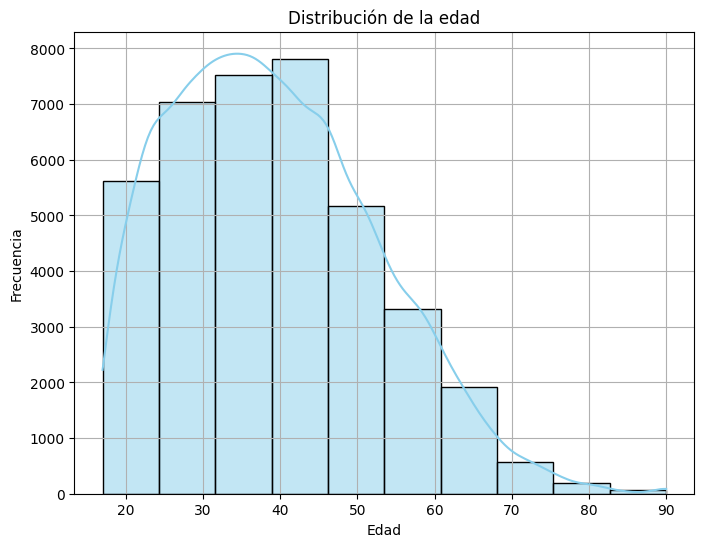

In [153]:
# hist de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="age", bins=10, kde=True, color="skyblue")
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

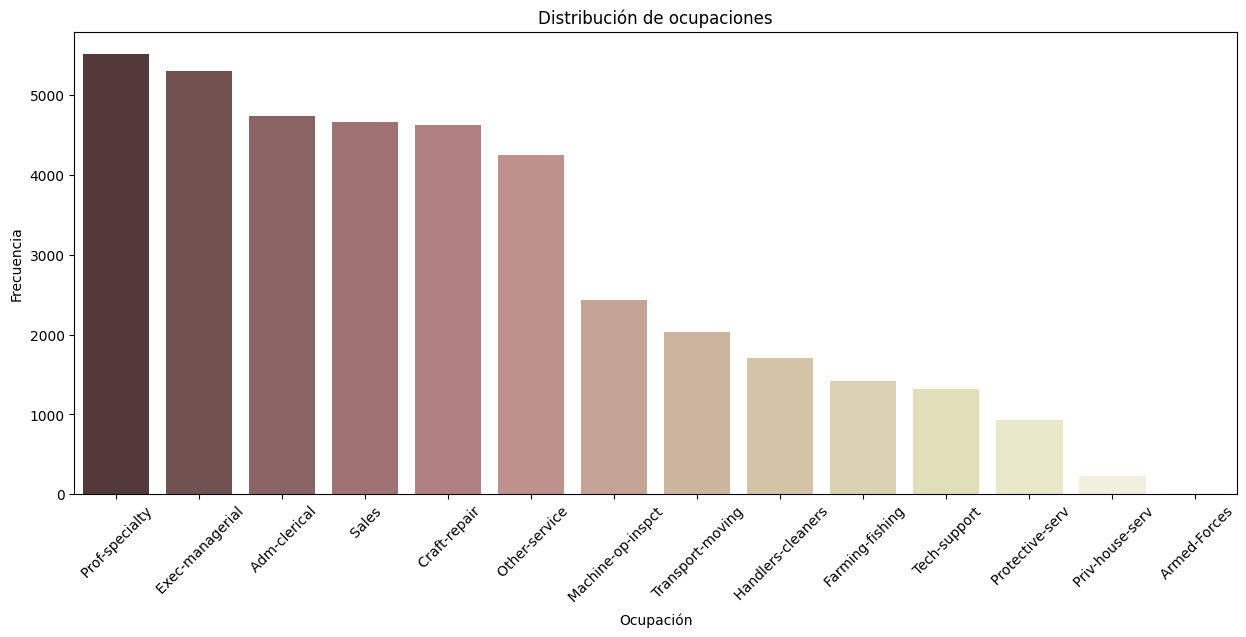

In [159]:
# la frecuencia de cada ocupación
occupation_counts = df["occupation"].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette="pink")
plt.title("Distribución de ocupaciones")
plt.xlabel("Ocupación")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

### ANÁLISIS BIVARIANTE

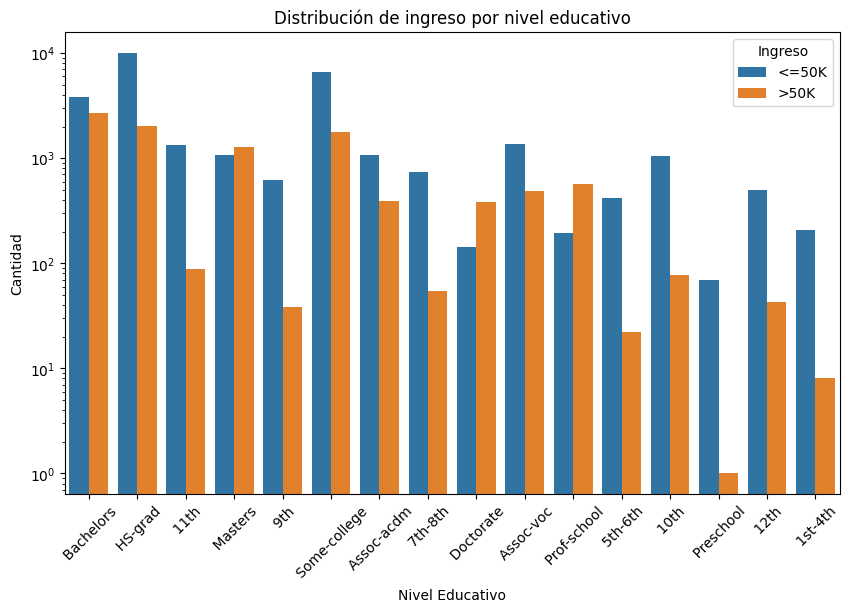

In [135]:
#  la relación entre el nivel educativo y el ingreso

plt.figure(figsize=(10, 6))
sns.countplot(x="education_level", hue="income", data=df)
plt.title("Distribución de ingreso por nivel educativo")
plt.yscale("log") 
plt.xlabel("Nivel Educativo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Ingreso", loc="upper right")
plt.show()

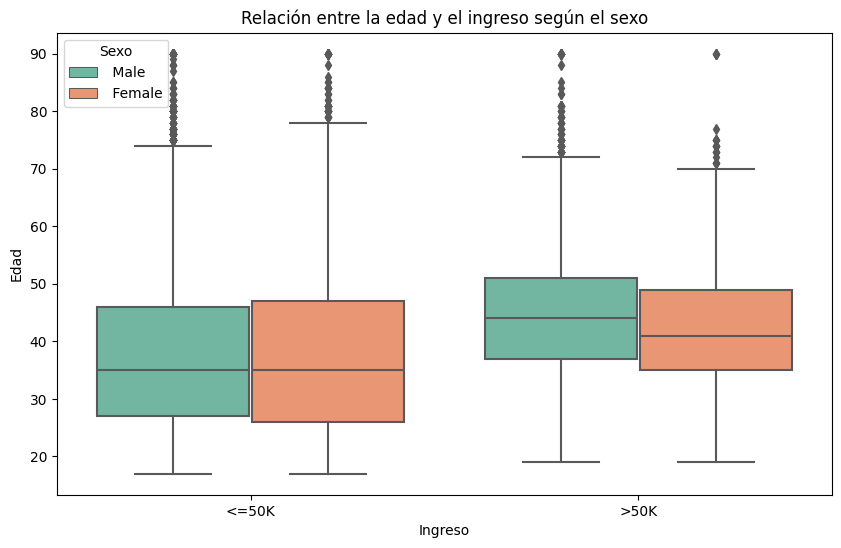

In [162]:
#  la relación entre la edad y el ingreso según el sexo

plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", hue="sex", data=df, palette="Set2")
plt.title("Relación entre la edad y el ingreso según el sexo")
plt.xlabel("Ingreso")
plt.ylabel("Edad")
plt.legend(title="Sexo", loc="upper left")
plt.show()

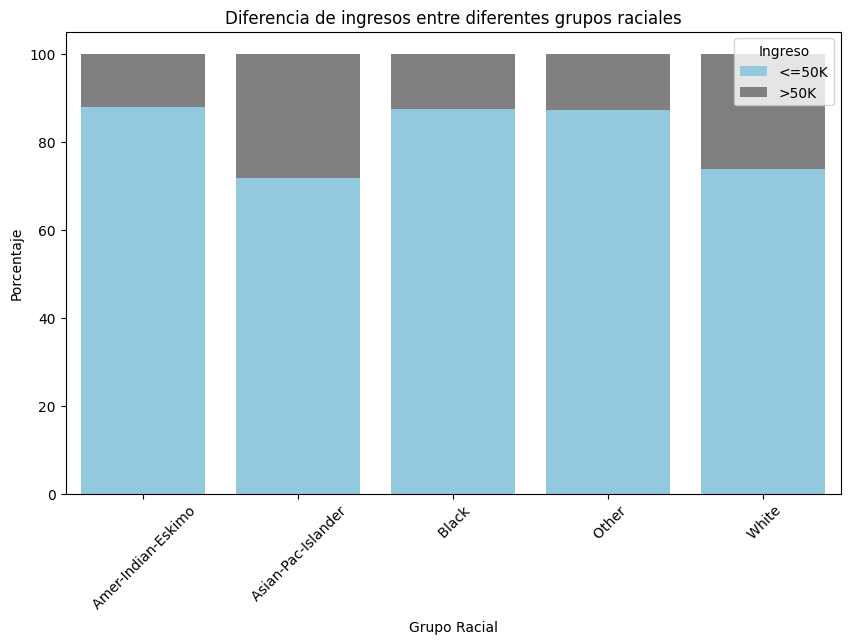

In [76]:
#  la diferencia de ingresos entre diferentes grupos raciales

# el porcentaje de cada grupo racial con ingresos <=50K y >50K
income_con= df.groupby(["race","income"]).size().unstack()
income_con["Total"]= income_con.sum(axis=1)
income_con["<=50K_percent"]= income_con["<=50K"]/income_con["Total"] *100
income_con[">50K_percent"]= income_con[">50K"] / income_con["Total"]* 100


plt.figure(figsize=(10, 6))
sns.barplot(x=income_con.index, y="<=50K_percent",data=income_con, color="skyblue", label="<=50K")
sns.barplot(x=income_con.index, y=">50K_percent", data=income_con, color="grey",bottom=income_con["<=50K_percent"],label=">50K")
plt.title("Diferencia de ingresos entre diferentes grupos raciales")
plt.xlabel("Grupo Racial")
plt.ylabel("Porcentaje")
plt.legend(title="Ingreso", loc="upper right")
plt.xticks(rotation=45)
plt.show()

### ANÁLISIS MULTIVARIANTE

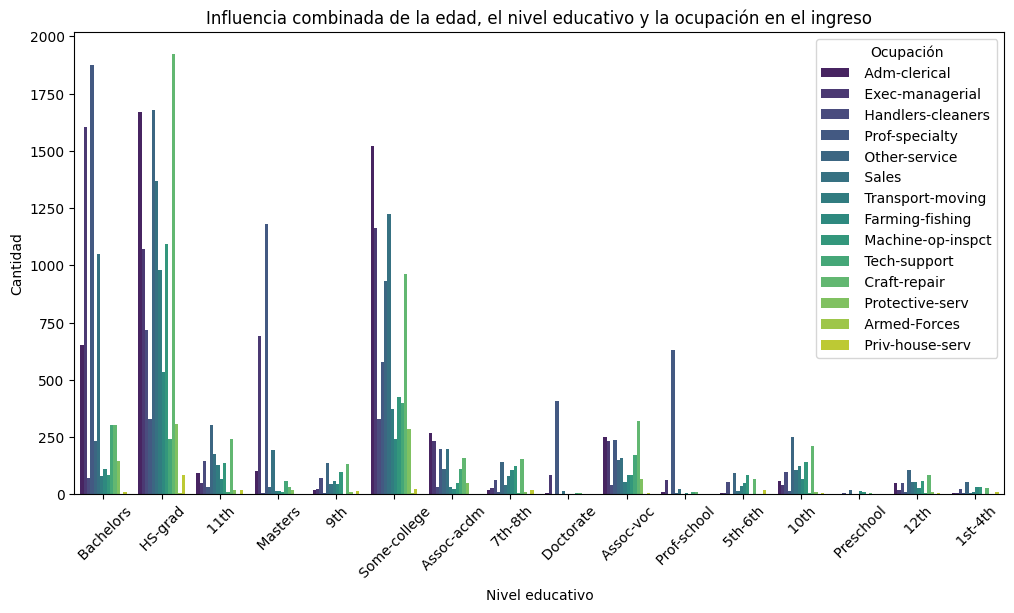

In [137]:
#  la influencia combinada de la edad, el nivel educativo y la ocupación en el ingreso

plt.figure(figsize=(12, 6))
sns.countplot(x="education_level", hue="occupation",data=df, palette="viridis", dodge=True)
plt.title("Influencia combinada de la edad, el nivel educativo y la ocupación en el ingreso")
plt.xlabel("Nivel educativo")
plt.ylabel("Cantidad")
plt.legend(title="Ocupación",loc="upper right")
plt.xticks(rotation=45)
plt.show()

In [103]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

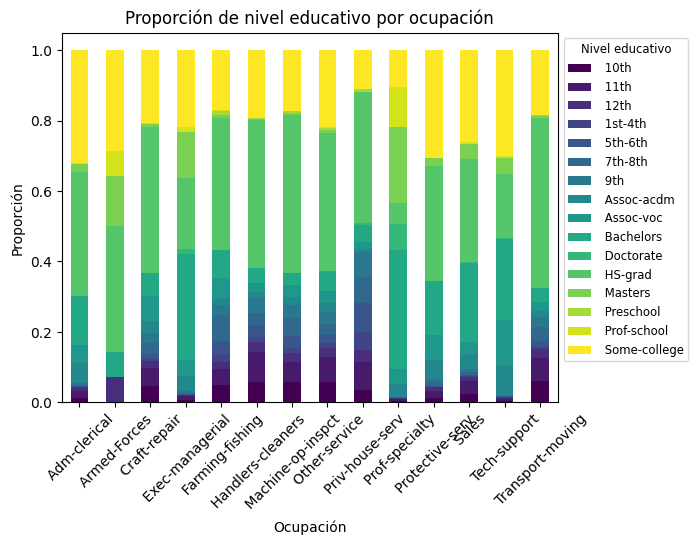

In [121]:
#  el nivel educativo, ocupación e ingreso

# la proporción de cada nivel educativo en cada ocupación
proporcion_df= df.groupby(["occupation","education_level"]).size().unstack(fill_value=0)
proporcion_df= proporcion_df.div(proporcion_df.sum(axis=1),axis=0)

plt.figure(figsize=(10, 6))
proporcion_df.plot(kind="bar",stacked=True,colormap="viridis")
plt.title("Proporción de nivel educativo por ocupación")
plt.xlabel("Ocupación")
plt.ylabel("Proporción")
plt.legend(title="Nivel educativo",loc="upper left", bbox_to_anchor=(1,1), fontsize="small",title_fontsize="small")
plt.xticks(rotation=45)
plt.show()

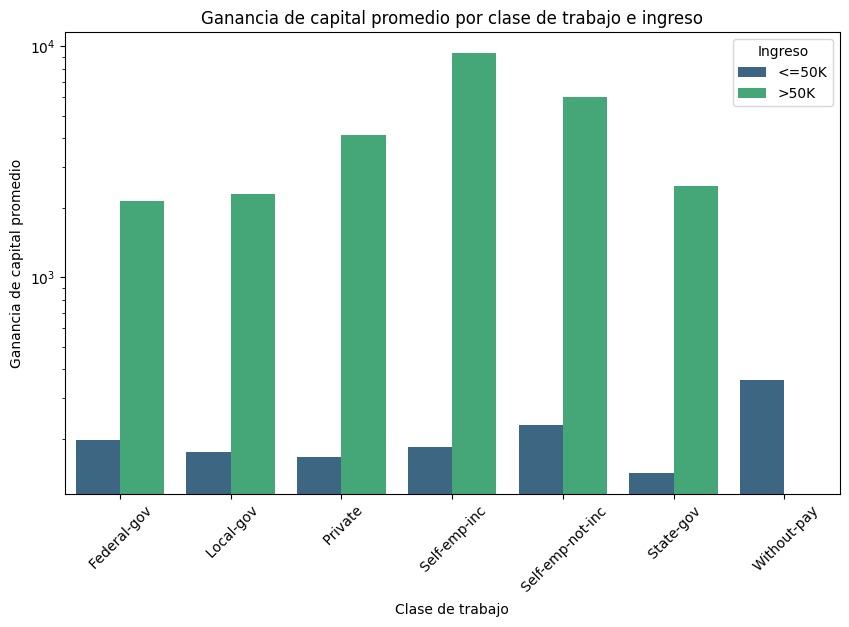

In [171]:
# la ganancia de capital promedio para cada clase de trabajo e ingreso
cap_gain=df.groupby(["workclass","income"])["capital-gain"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="workclass", y="capital-gain", hue="income",data=cap_gain, palette="viridis")
plt.yscale("log") 
plt.title("Ganancia de capital promedio por clase de trabajo e ingreso")
plt.xlabel("Clase de trabajo")
plt.ylabel("Ganancia de capital promedio")
plt.legend(title="Ingreso",loc="upper right")
plt.xticks(rotation=45) 
plt.show()

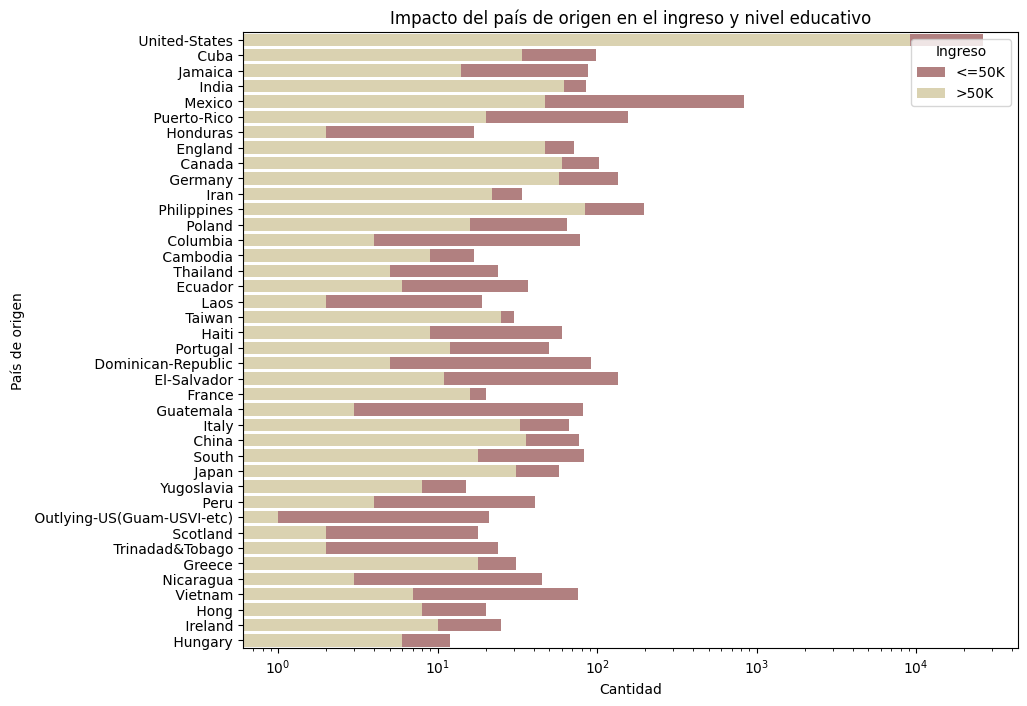

In [169]:
# Impacto del país de origen en el ingreso y nivel educativo
countries = df['native-country'].value_counts()[df['native-country'].value_counts() > 1].index
df_filtered = df[df['native-country'].isin(countries)]

plt.figure(figsize=(10, 8))
sns.countplot(y="native-country", hue="income", data=df_filtered, hue_order=["<=50K", ">50K"], palette="pink", dodge=False)
plt.xscale("log") 
plt.title("Impacto del país de origen en el ingreso y nivel educativo")
plt.xlabel("Cantidad")
plt.ylabel("País de origen")
plt.legend(title="Ingreso", loc="upper right") 
plt.show()

## HIPOTESIS

1. ¿Existen diferencias significativas en la ganancia de capital promedio entre diferentes clases de trabajo?

In [177]:
datos_anova=[]

for clase_trabajo in df["workclass"].unique():
    ganancia_capital= df[df["workclass"]==clase_trabajo]["capital-gain"]
    datos_anova.append(ganancia_capital)

# ANOVA
estadistico_anova, p_valor_anova =stats.f_oneway(*datos_anova)
nivel_significancia = 0.05

print("Estadístico de prueba ANOVA:", estadistico_anova)
print("Valor p del ANOVA:",p_valor_anova)

if p_valor_anova<nivel_significancia:
    print("Rechazamos la hipótesis nula.")
    print("Hay diferencias significativas en la ganancia de capital entre al menos dos clases de trabajo.")
else:
    print("No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para concluir que existen diferencias significativas en la ganancia de capital entre las clases de trabajo.")

Estadístico de prueba ANOVA: 75.33570094282284
Valor p del ANOVA: 6.436616654192205e-94
Rechazamos la hipótesis nula.
Hay diferencias significativas en la ganancia de capital entre al menos dos clases de trabajo.


2. ¿Cómo varía la ganancia de capital promedio según el nivel de ingreso, y estas variaciones son consistentes en todas las clases de trabajo?

In [179]:
ganancia_baja= df[df["income"]=="<=50K"]["capital-gain"]
ganancia_alta= df[df["income"]==">50K"]["capital-gain"]

#Kruskal-Wallis
estadistico_kw, p_valor_kw= stats.kruskal(ganancia_baja, ganancia_alta)


print("Estadístico de prueba de Kruskal-Wallis:", estadistico_kw)
print("Valor p del Kruskal-Wallis:", p_valor_kw)

nivel_significancia=0.05
if p_valor_kw <nivel_significancia:
    print("Rechazamos la hipótesis nula.")
    print("Hay diferencias significativas en la ganancia de capital entre diferentes niveles de ingreso.")
else:
    print("No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para concluir que existen diferencias significativas en la ganancia de capital entre diferentes niveles de ingreso.")

Estadístico de prueba de Kruskal-Wallis: 3308.20650390595
Valor p del Kruskal-Wallis: 0.0
Rechazamos la hipótesis nula.
Hay diferencias significativas en la ganancia de capital entre diferentes niveles de ingreso.


3. ¿Varía la proporción de individuos con diferentes niveles educativos entre diferentes ocupaciones e ingreso de manera significativa?

In [182]:
tabla_contingencia= pd.crosstab(df["education_level"],df["occupation"])

# Pearson
estadistico_chi2, p_valor_chi2, _, _= stats.chi2_contingency(tabla_contingencia)

print("Estadístico de prueba Chi-cuadrado:", estadistico_chi2)
print("Valor p del Chi-cuadrado:",p_valor_chi2)

nivel_significancia= 0.05
if p_valor_chi2< nivel_significancia:
    print("Rechazamos la hipótesis nula.")
    print("Varía la proporción de individuos con diferentes niveles educativos entre diferentes ocupaciones de manera significativa.")
else:
    print("No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para concluir que varía la proporción de individuos con diferentes niveles educativos entre diferentes ocupaciones de manera significativa.")

Estadístico de prueba Chi-cuadrado: 18858.83395762128
Valor p del Chi-cuadrado: 0.0
Rechazamos la hipótesis nula.
Varía la proporción de individuos con diferentes niveles educativos entre diferentes ocupaciones de manera significativa.


4. ¿Existen diferencias significativas en la distribución de ingresos entre hombres y mujeres? 

In [195]:
con_tabla= pd.crosstab(df["sex"], df["income"])

#  test de chi-cuadrado 
chi2, p_value, _, _ =chi2_contingency(con_tabla)

print("Estadístico de prueba Chi-cuadrado:",chi2)
print("Valor p del Chi-cuadrado:", p_value)

if p_value< 0.05:
    print("Rechazamos la hipótesis nula.")
    print("Existen diferencias significativas en la distribución de ingresos entre hombres y mujeres.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que existen diferencias significativas en la distribución de ingresos entre hombres y mujeres.")

Estadístico de prueba Chi-cuadrado: 1778.0158546255777
Valor p del Chi-cuadrado: 0.0
Rechazamos la hipótesis nula.
Existen diferencias significativas en la distribución de ingresos entre hombres y mujeres.
